<a href="https://colab.research.google.com/github/damar3c50/KMeans_NBA-21-22/blob/main/NBA_21_22_Regular_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Prepare Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/2021-2022 NBA Player Stats - Regular.csv', sep=";", encoding='cp1252')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

- Rk : Rank
- Player : Player's name
- Pos : Position
- Age : Player's age
- Tm : Team
- G : Games played
- GS : Games started
- MP : Minutes played per game
- FG : Field goals per game
- GA : Field goal attempts per game
- FG% : Field goal percentage
- 3P : 3-point field goals per game
- 3PA : 3-point field goal attempts per game
- 3P% : 3-point field goal percentage
- 2P : 2-point field goals per game
- 2PA : 2-point field goal attempts per game
- 2P% : 2-point field goal percentage
- eFG% : Effective field goal percentage
- FT : Free throws per game
- FTA : Free throw attempts per game
- FT% : Free throw percentage
- ORB : Offensive rebounds per game
- DRB : Defensive rebounds per game
- TRB : Total rebounds per game
- AST : Assists per game
- STL : Steals per game
- BLK : Blocks per game
- TOV : Turnovers per game
- PF : Personal fouls per game
- PTS : Points per game

In [ ]:
df_1 = df.iloc[:, 0:14].head()
df_1

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304


In [ ]:
df_2 = df.iloc[:, 14:].head()
df_2

,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


###Data Preprocessing

Drop Rk column because there is no information in there

In [ ]:
df.drop(['Rk'], inplace=True, axis=1)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


**Check duplicate rows**

In [ ]:
duplicated = df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size().reset_index(name='count')

print(duplicated)

Empty DataFrame
Columns: [Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, count]
Index: []

[0 rows x 30 columns]


**Summary descriptive statistic**

In [ ]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,26.051724,36.704433,16.672414,18.265394,2.869951,6.386576,0.426235,0.871305,2.560591,0.276538,...,0.658267,0.812931,2.519828,3.331650,1.808251,0.582759,0.353571,0.978695,1.564655,7.812438
std,4.059640,25.899099,23.817195,9.648292,2.223988,4.651121,0.148525,0.841935,2.205642,0.157579,...,0.283491,0.744196,1.790656,2.352818,1.838080,0.425452,0.360811,0.817941,0.826783,6.138077
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,0.224000,...,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,0.321500,...,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,0.370250,...,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,1.000000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


**Check missing values**

In [ ]:
df.isna().sum()

#Tidak ada missing values

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

**Lowering column name**
- Tujuannya dapat mempermudah dalam menulis syntax python

In [ ]:
df = df.rename(columns=str.lower)
df.head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


**Check Outliers**

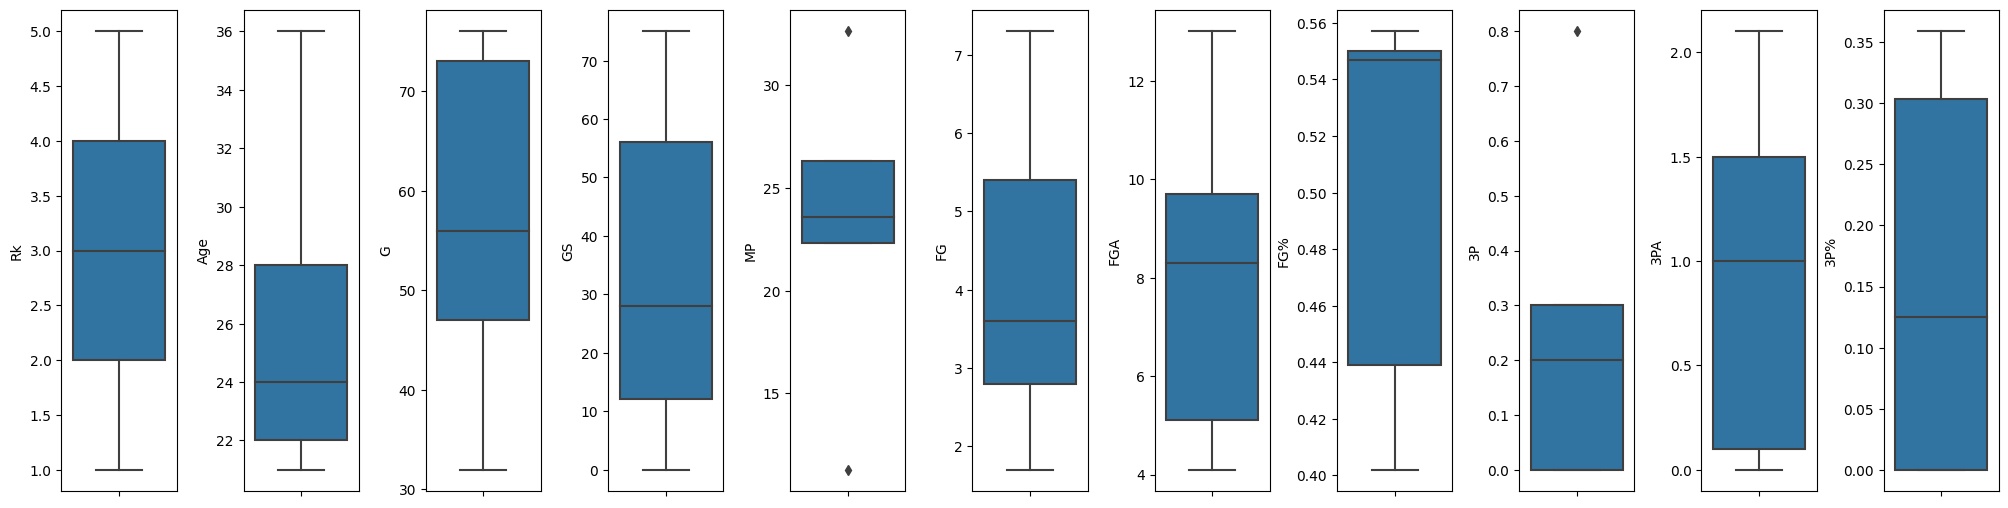

In [ ]:
num_cols = df_1.select_dtypes(exclude=['object']).columns

fig, axs = plt.subplots(ncols=len(num_cols), figsize=(20,5))
for i, column in enumerate(num_cols):
  sns.boxplot(y=column, data=df_1, ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

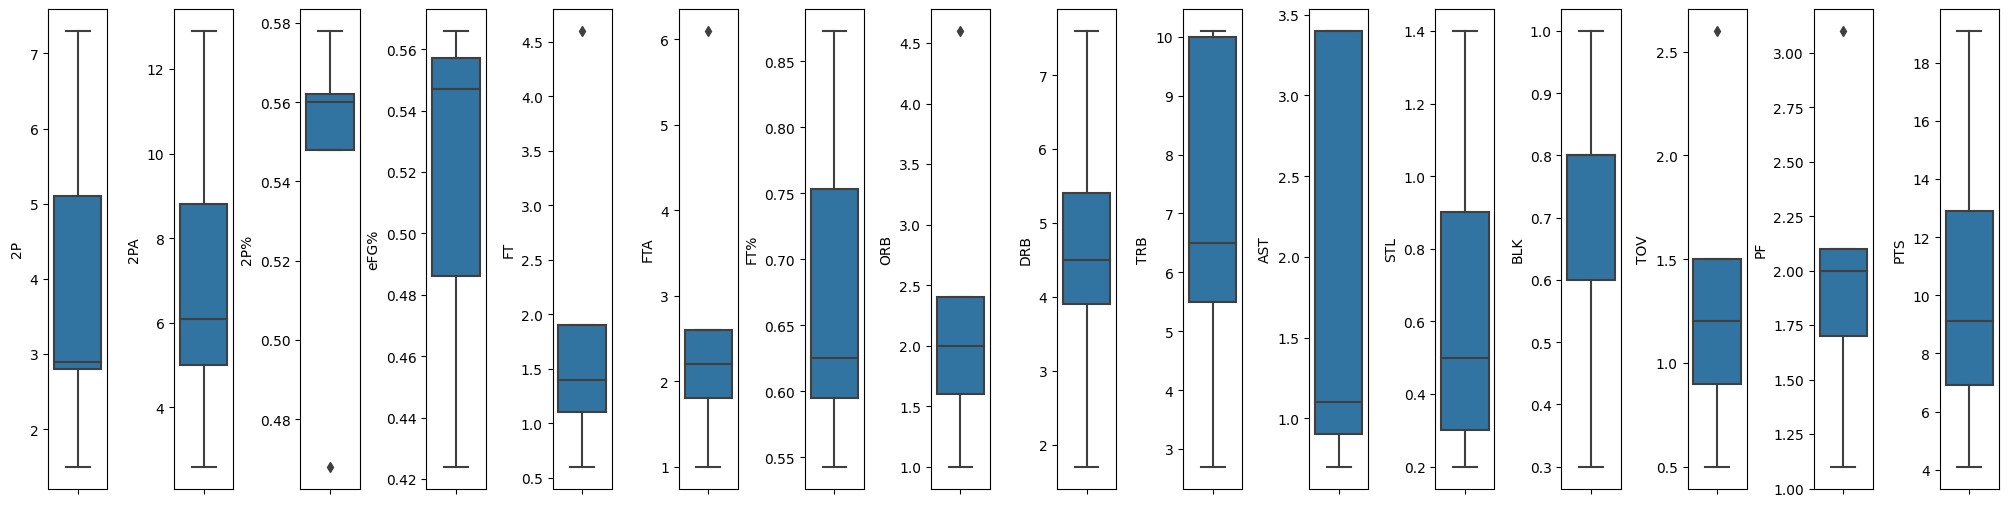

In [ ]:
num_cols = df_2.select_dtypes(exclude=['object']).columns

fig, axs = plt.subplots(ncols=len(num_cols), figsize=(20,5))
for i, column in enumerate(num_cols):
  sns.boxplot(y=column, data=df_2, ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
df.describe()

,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,26.051724,36.704433,16.672414,18.265394,2.869951,6.386576,0.426235,0.871305,2.560591,0.276538,...,0.658267,0.812931,2.519828,3.331650,1.808251,0.582759,0.353571,0.978695,1.564655,7.812438
std,4.059640,25.899099,23.817195,9.648292,2.223988,4.651121,0.148525,0.841935,2.205642,0.157579,...,0.283491,0.744196,1.790656,2.352818,1.838080,0.425452,0.360811,0.817941,0.826783,6.138077
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,0.224000,...,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,0.321500,...,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,0.370250,...,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,1.000000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


In [ ]:
num_cols = df.select_dtypes(exclude=['object']).columns
x = df[(df[num_cols] > df[num_cols].quantile(0.98))].count()
print(x)

player     0
pos        0
age       14
tm         0
g         13
gs        14
mp        17
fg        16
fga       16
fg%       17
3p        15
3pa       15
3p%       14
2p        16
2pa       17
2p%        0
efg%      15
ft        17
fta       17
ft%        0
orb       16
drb       17
trb       16
ast       16
stl        9
blk       15
tov       14
pf        16
pts       17
dtype: int64


In [ ]:
df.drop(x, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 1 to 811
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  805 non-null    object 
 1   pos     805 non-null    object 
 2   age     805 non-null    int64  
 3   tm      805 non-null    object 
 4   g       805 non-null    int64  
 5   gs      805 non-null    int64  
 6   mp      805 non-null    float64
 7   fg      805 non-null    float64
 8   fga     805 non-null    float64
 9   fg%     805 non-null    float64
 10  3p      805 non-null    float64
 11  3pa     805 non-null    float64
 12  3p%     805 non-null    float64
 13  2p      805 non-null    float64
 14  2pa     805 non-null    float64
 15  2p%     805 non-null    float64
 16  efg%    805 non-null    float64
 17  ft      805 non-null    float64
 18  fta     805 non-null    float64
 19  ft%     805 non-null    float64
 20  orb     805 non-null    float64
 21  drb     805 non-null    float64
 22  tr

###EDA

In [ ]:
df.iloc[:, :14].head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1
5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,1.6,5.2,0.311,2.3


In [ ]:
df.iloc[:, 14:].head()

,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
1,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,5.3,0.433,0.449,1.2,1.7,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6


**Univariate Analysis**



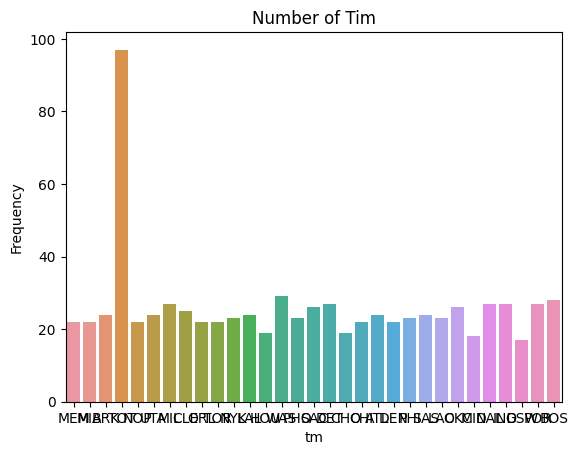

In [ ]:
sns.countplot(data=df, x='tm')
plt.title('Number of Tim')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['tm'].value_counts()

TOT    97
WAS    29
BOS    28
POR    27
IND    27
DAL    27
MIL    27
DET    27
OKC    26
SAC    26
CLE    25
BRK    24
UTA    24
SAS    24
ATL    24
LAL    24
NYK    23
PHI    23
PHO    23
LAC    23
NOP    22
DEN    22
CHI    22
ORL    22
MIA    22
TOR    22
MEM    22
CHO    19
HOU    19
MIN    18
GSW    17
Name: tm, dtype: int64

Drop TOT in TM column because there is no nba tim call TOT

In [ ]:
df = df.loc[df['tm'] != 'TOT']
df.shape

(708, 29)

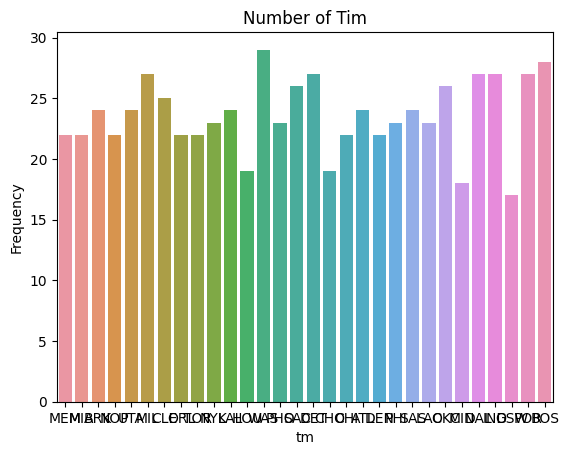

In [ ]:
sns.countplot(data=df, x='tm')
plt.title('Number of Tim')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

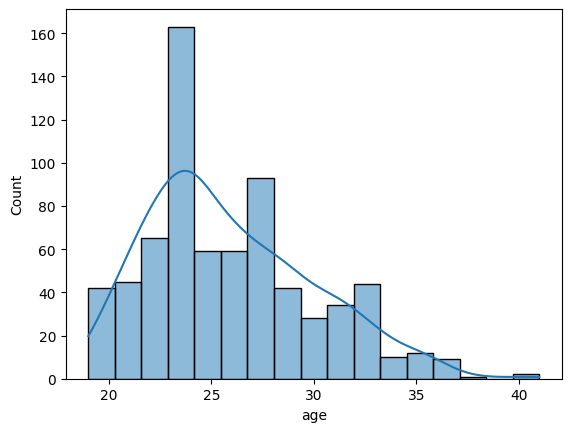

In [ ]:
sns.histplot(data=df, x='age', kde=True)

<Axes: xlabel='pts', ylabel='Count'>

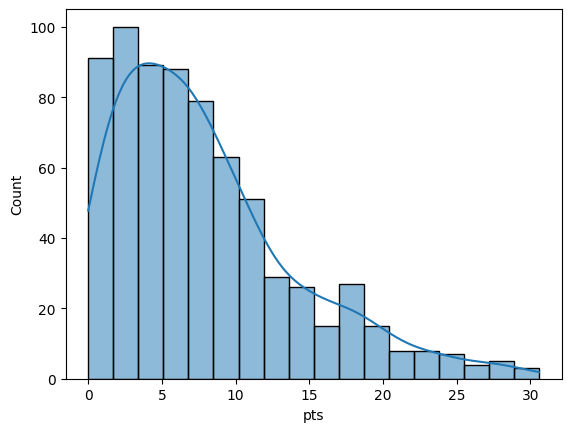

In [ ]:
sns.histplot(data=df, x='pts', kde=True)

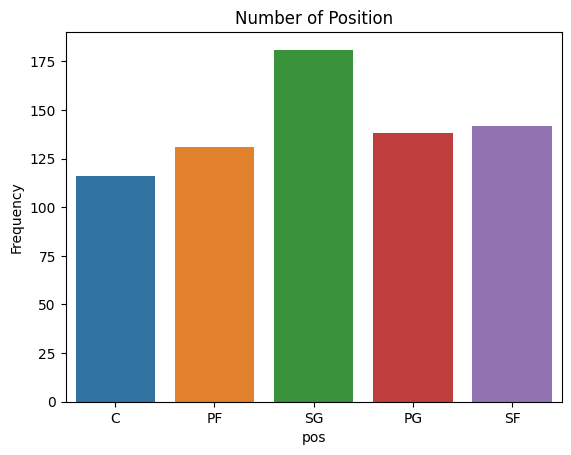

In [ ]:
sns.countplot(data=df, x='pos')
plt.title('Number of Position')
plt.ylabel('Frequency')
plt.show()

Check unique value in Player column

In [ ]:
count_players = df['player'].value_counts().to_frame()
count_players.head(10)

#hasil ini menunjukkan bahwa terdapat beberapa pemain yang pindah tim selama satu season

,player
Greg Monroe,4
Jeff Dowtin,3
James Ennis III,3
Wenyen Gabriel,3
Alize Johnson,3
Danuel House Jr.,3
Tristan Thompson,3
Justin Robinson,3
Tomáš Satoransk?,3
Isaiah Thomas,3


<Axes: ylabel='player'>

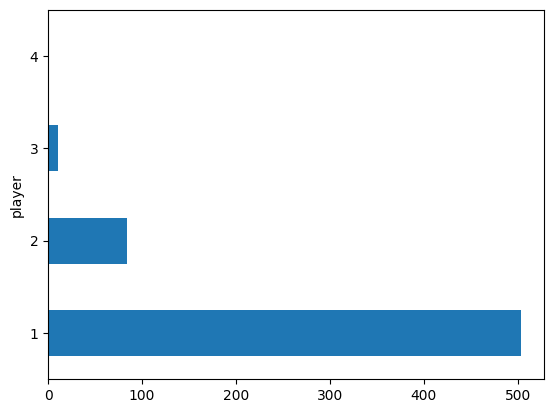

In [ ]:
count_move_tim = count_players.groupby('player')['player'].count()
count_move_tim.plot(kind='barh')

**Bivariate Analysis**

Numerical vs Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 811
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  708 non-null    object 
 1   pos     708 non-null    object 
 2   age     708 non-null    int64  
 3   tm      708 non-null    object 
 4   g       708 non-null    int64  
 5   gs      708 non-null    int64  
 6   mp      708 non-null    float64
 7   fg      708 non-null    float64
 8   fga     708 non-null    float64
 9   fg%     708 non-null    float64
 10  3p      708 non-null    float64
 11  3pa     708 non-null    float64
 12  3p%     708 non-null    float64
 13  2p      708 non-null    float64
 14  2pa     708 non-null    float64
 15  2p%     708 non-null    float64
 16  efg%    708 non-null    float64
 17  ft      708 non-null    float64
 18  fta     708 non-null    float64
 19  ft%     708 non-null    float64
 20  orb     708 non-null    float64
 21  drb     708 non-null    float64
 22  tr

In [ ]:
import plotly.express as px

x_var = 'pts'
y_var = 'efg%'

#Scaterr plot
def scatter_plot(x, y):
  '''
  membuat scatter plot untuk membandingkan data numerik dan data numerik
  x = masukkan variabel pertama
  y = masukkan variabel kedua
  '''
  fig = px.scatter(df, x=x_var, y=y_var,
                   title=f'Scatter Plot: {x_var} vs {y_var}')

  fig.show()

scatter_plot(x_var, y_var)

In [ ]:
x_var = 'fg'
y_var = 'pts'

scatter_plot(x_var, y_var)

In [ ]:
x_var = '3p'
y_var = 'pts'

scatter_plot(x_var, y_var)

In [ ]:
x_var = '2p'
y_var = 'pts'

scatter_plot(x_var, y_var)

In [ ]:
x_var = 'ft'
y_var = 'pts'

scatter_plot(x_var, y_var)

In [ ]:
x_var = 'gs'
y_var = 'pts'

scatter_plot(x_var, y_var)

In [ ]:
x_var = 'fg'
y_var = 'gs'

scatter_plot(x_var, y_var)

In [ ]:
x_var = 'gs'
y_var = 'pts'

scatter_plot(x_var, y_var)

In [ ]:
corr_matrix = df.select_dtypes(exclude='object').corr()

#Create a heatmap for correlation
fig = px.imshow(corr_matrix,
                x = corr_matrix.columns,
                y = corr_matrix.columns,
                color_continuous_scale='Viridis',
                title='Correlation Heatmap')

fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix

<ipython-input-38-0a7db4298423>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
age,1.000000,0.011399,0.056989,0.144175,0.090518,0.084612,0.063631,0.115431,0.098806,0.077323,...,0.071326,0.022609,0.128662,0.105567,0.164801,0.074538,0.034272,0.089242,0.119897,0.096498
g,0.011399,1.000000,0.693307,0.620900,0.561805,0.539450,0.313733,0.479268,0.462092,0.390864,...,0.485946,0.291053,0.516175,0.487158,0.383078,0.423895,0.327895,0.418288,0.472930,0.557415
gs,0.056989,0.693307,1.000000,0.744296,0.727563,0.705498,0.224338,0.527460,0.521913,0.241991,...,0.302948,0.355196,0.652375,0.610835,0.550848,0.514861,0.400202,0.606414,0.536191,0.722624
mp,0.144175,0.620900,0.744296,1.000000,0.886423,0.897187,0.304848,0.721361,0.734538,0.434752,...,0.525230,0.361388,0.760148,0.694182,0.727195,0.715115,0.442809,0.769467,0.745145,0.886728
fg,0.090518,0.561805,0.727563,0.886423,1.000000,0.971638,0.355793,0.687952,0.689163,0.374777,...,0.450472,0.375063,0.761919,0.699680,0.712837,0.616863,0.432301,0.813205,0.645725,0.990163
fga,0.084612,0.539450,0.705498,0.897187,0.971638,1.000000,0.215311,0.768164,0.798658,0.386100,...,0.458530,0.255431,0.698364,0.613166,0.748186,0.636009,0.344407,0.827936,0.610098,0.976622
fg%,0.063631,0.313733,0.224338,0.304848,0.355793,0.215311,1.000000,0.067828,-0.002659,0.230202,...,0.287118,0.421057,0.367837,0.414334,0.115524,0.174560,0.386542,0.199632,0.394149,0.314483
3p,0.115431,0.479268,0.527460,0.721361,0.687952,0.768164,0.067828,1.000000,0.969502,0.560473,...,0.451948,-0.102284,0.374161,0.252957,0.543981,0.506752,0.088381,0.546715,0.382402,0.738033
3pa,0.098806,0.462092,0.521913,0.734538,0.689163,0.798658,-0.002659,0.969502,1.000000,0.480675,...,0.429567,-0.115541,0.382557,0.254870,0.568954,0.519375,0.080968,0.580511,0.386835,0.737137
3p%,0.077323,0.390864,0.241991,0.434752,0.374777,0.386100,0.230202,0.560473,0.480675,1.000000,...,0.476080,-0.015801,0.212390,0.156743,0.265075,0.288896,0.074516,0.247030,0.268705,0.397948


In [ ]:
filter_corr = correlation_matrix[correlation_matrix > 0.9].stack()
filter_corr = filter_corr.reset_index()
filter_corr.head()

,level_0,level_1,0
0,age,age,1.0
1,g,g,1.0
2,gs,gs,1.0
3,mp,mp,1.0
4,fg,fg,1.0


In [ ]:
filter_corr = filter_corr[(filter_corr[0] > 0.9) & (filter_corr[0] != 1.0)]
filter_corr

,level_0,level_1,0
5,fg,fga,0.971638
6,fg,2p,0.936109
7,fg,2pa,0.943708
8,fg,pts,0.990163
9,fga,fg,0.971638
11,fga,2pa,0.909449
12,fga,pts,0.976622
14,fg%,efg%,0.957018
16,3p,3pa,0.969502
17,3pa,3p,0.969502


In [ ]:
filter_corr['level_0'].value_counts()

fg      4
2pa     4
fga     3
pts     3
2p      2
fg%     1
3p      1
3pa     1
efg%    1
ft      1
fta     1
drb     1
trb     1
Name: level_0, dtype: int64

In [ ]:
filter_corr['level_1'].value_counts()

2pa     4
fg      4
fga     3
pts     3
2p      2
efg%    1
3pa     1
3p      1
fg%     1
fta     1
ft      1
trb     1
drb     1
Name: level_1, dtype: int64

Numerical vs Categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 811
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  708 non-null    object 
 1   pos     708 non-null    object 
 2   age     708 non-null    int64  
 3   tm      708 non-null    object 
 4   g       708 non-null    int64  
 5   gs      708 non-null    int64  
 6   mp      708 non-null    float64
 7   fg      708 non-null    float64
 8   fga     708 non-null    float64
 9   fg%     708 non-null    float64
 10  3p      708 non-null    float64
 11  3pa     708 non-null    float64
 12  3p%     708 non-null    float64
 13  2p      708 non-null    float64
 14  2pa     708 non-null    float64
 15  2p%     708 non-null    float64
 16  efg%    708 non-null    float64
 17  ft      708 non-null    float64
 18  fta     708 non-null    float64
 19  ft%     708 non-null    float64
 20  orb     708 non-null    float64
 21  drb     708 non-null    float64
 22  tr

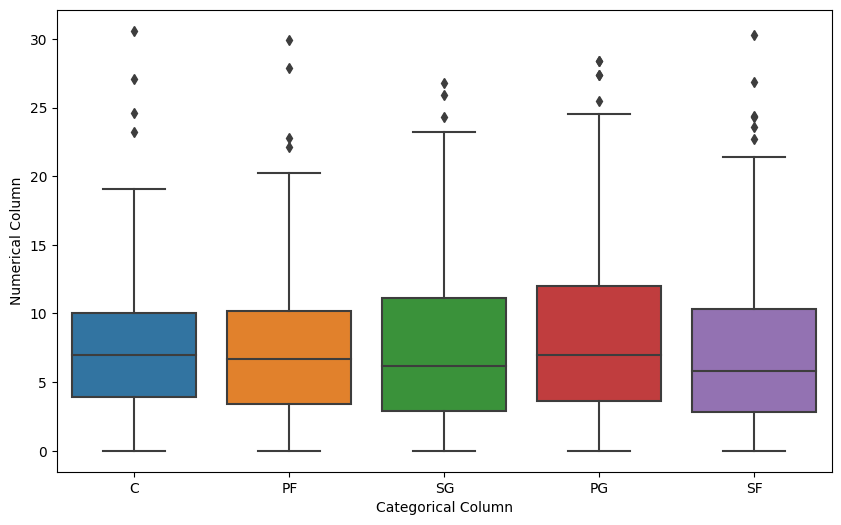

In [ ]:
# Create a box plot
x_var = 'pos'
y_var = 'pts'

def catnu(x, y):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=x_var, y=y_var, data=df)
  plt.xlabel('Categorical Column')
  plt.ylabel('Numerical Column')
  plt.show()

catnu(x_var, y_var)

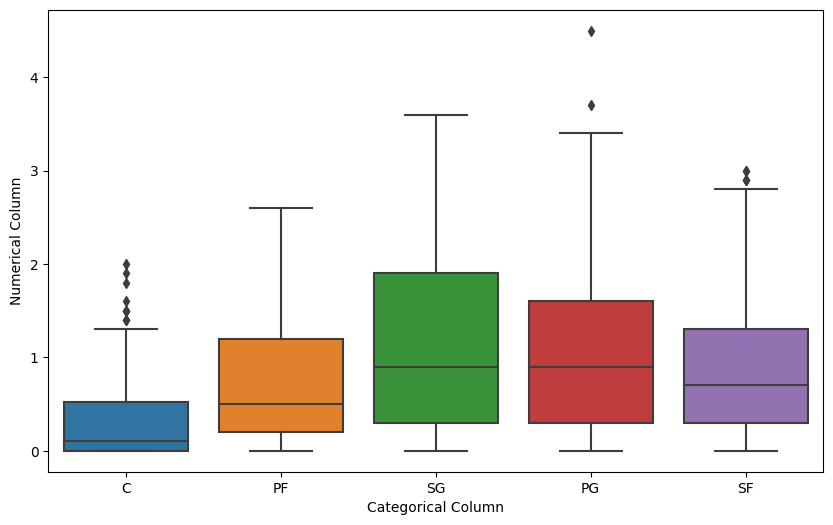

In [ ]:
x_var = 'pos'
y_var = '3p'

catnu(x_var, y_var)

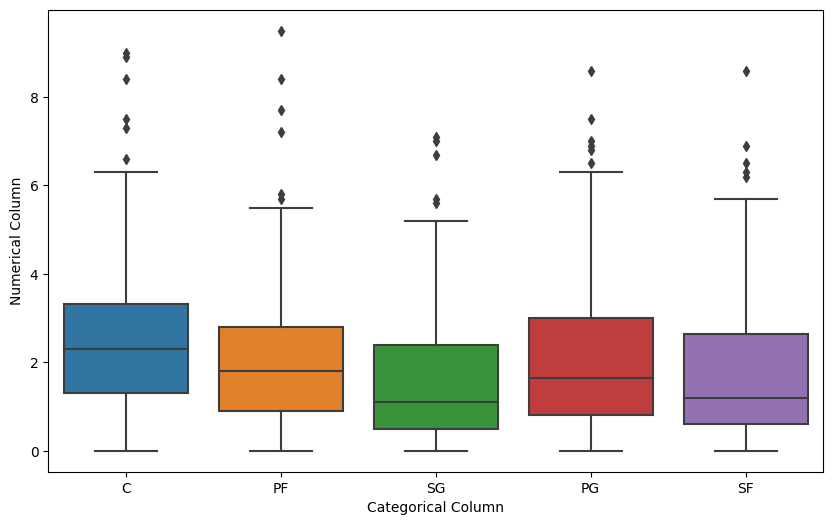

In [ ]:
x_var = 'pos'
y_var = '2p'

catnu(x_var, y_var)

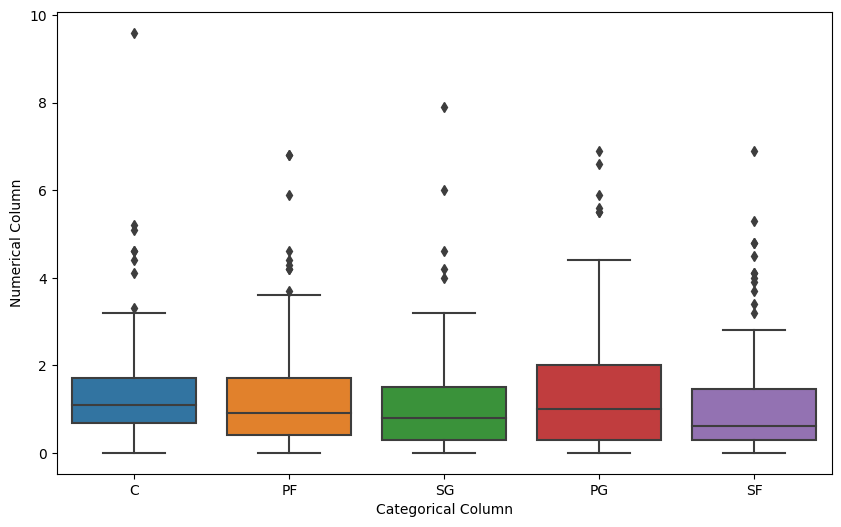

In [ ]:
x_var = 'pos'
y_var = 'ft'

catnu(x_var, y_var)

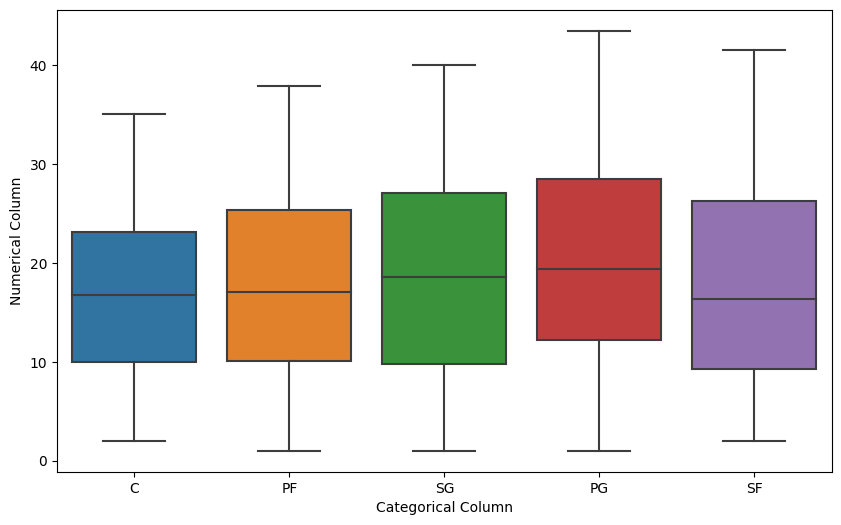

In [ ]:
x_var = 'pos'
y_var = 'mp'

catnu(x_var, y_var)

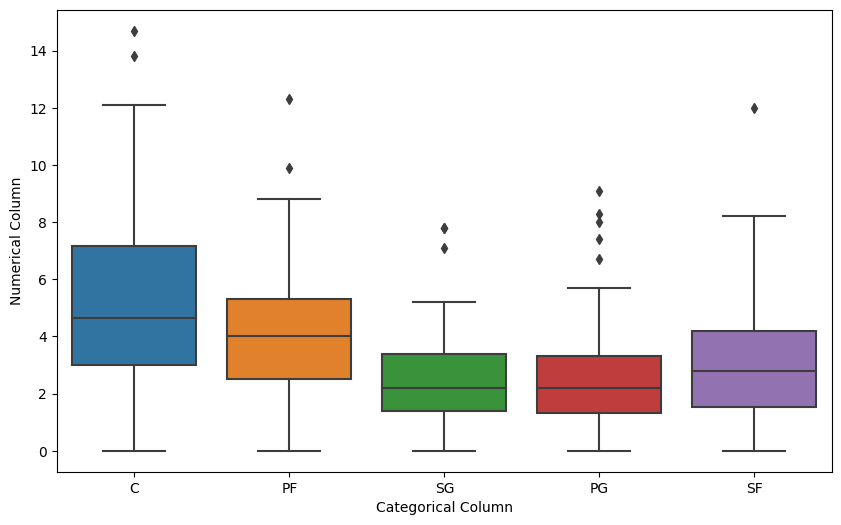

In [ ]:
x_var = 'pos'
y_var = 'trb'

catnu(x_var, y_var)

Multivariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 811
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  708 non-null    object 
 1   pos     708 non-null    object 
 2   age     708 non-null    int64  
 3   tm      708 non-null    object 
 4   g       708 non-null    int64  
 5   gs      708 non-null    int64  
 6   mp      708 non-null    float64
 7   fg      708 non-null    float64
 8   fga     708 non-null    float64
 9   fg%     708 non-null    float64
 10  3p      708 non-null    float64
 11  3pa     708 non-null    float64
 12  3p%     708 non-null    float64
 13  2p      708 non-null    float64
 14  2pa     708 non-null    float64
 15  2p%     708 non-null    float64
 16  efg%    708 non-null    float64
 17  ft      708 non-null    float64
 18  fta     708 non-null    float64
 19  ft%     708 non-null    float64
 20  orb     708 non-null    float64
 21  drb     708 non-null    float64
 22  tr

In [ ]:
x_var = 'pts'
y_var = 'fg%'
color_variable = 'pos'

def multi_anal(x, y, color_var):
  fig = px.scatter(df, x=x_var, y=y_var, color=color_variable,
                   title= f'Scatter Plot: {x_var} vs {y_var} (Colored by {color_variable})')
  fig.show()

multi_anal(x_var, y_var, color_variable)

In [ ]:
x_var = 'pts'
y_var = '3p%'
color_variable = 'pos'

multi_anal(x_var, y_var, color_variable)

In [ ]:
x_var = 'pts'
y_var = '2p%'
color_variable = 'pos'

multi_anal(x_var, y_var, color_variable)

In [ ]:
x_var = 'pts'
y_var = 'ft'
color_variable = 'pos'

multi_anal(x_var, y_var, color_variable)

In [ ]:
x_var = 'orb'
y_var = 'drb'
color_variable = 'pos'

multi_anal(x_var, y_var, color_variable)

In [ ]:
x_var = '2p%'
y_var = '3p%'
z_var = 'gs'
xyz_var ='pts'
color_variable = 'pos'
def multi_anal2(x, y, z, color_var, xyz):
  fig = px.scatter(df, x=x_var, y=y_var, color=color_variable,
                   size=z_var, hover_data=xyz_var)
  fig.show()

multi_anal2(x_var, y_var, z_var, color_variable, xyz_var)

###Data Analysis

**5 Pemain dengan perolehan poin murni terbanyak (PTS - FT)**

In [ ]:
df.head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,0.375,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 811
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  708 non-null    object 
 1   pos     708 non-null    object 
 2   age     708 non-null    int64  
 3   tm      708 non-null    object 
 4   g       708 non-null    int64  
 5   gs      708 non-null    int64  
 6   mp      708 non-null    float64
 7   fg      708 non-null    float64
 8   fga     708 non-null    float64
 9   fg%     708 non-null    float64
 10  3p      708 non-null    float64
 11  3pa     708 non-null    float64
 12  3p%     708 non-null    float64
 13  2p      708 non-null    float64
 14  2pa     708 non-null    float64
 15  2p%     708 non-null    float64
 16  efg%    708 non-null    float64
 17  ft      708 non-null    float64
 18  fta     708 non-null    float64
 19  ft%     708 non-null    float64
 20  orb     708 non-null    float64
 21  drb     708 non-null    float64
 22  tr

<Axes: xlabel='player'>

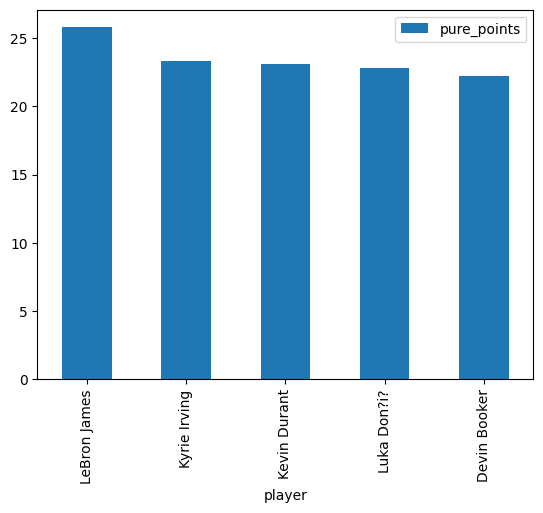

In [ ]:
df['pure_points'] = df['pts'] - df['ft']
pure_points_sort = df.sort_values(by=['pure_points'], ascending=False)[['player', 'pure_points']].head()
pure_points_sort.plot(kind='bar', x='player')

In [ ]:
pure_points_sort

,player,pure_points
368,LeBron James,25.8
356,Kyrie Irving,23.3
198,Kevin Durant,23.1
178,Luka Don?i?,22.8
70,Devin Booker,22.2


In [ ]:
df.sort_values(by=['pure_points'], ascending=False).head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,pure_points
368,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,...,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,25.8
356,Kyrie Irving,PG,29,BRK,29,29,37.6,10.0,21.2,0.469,...,0.6,3.8,4.4,5.8,1.4,0.6,2.5,2.8,27.4,23.3
198,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,...,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9,23.1
178,Luka Don?i?,PG,22,DAL,65,65,35.4,9.9,21.6,0.457,...,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,22.8
70,Devin Booker,SG,25,PHO,68,68,34.5,9.7,20.9,0.466,...,0.7,4.4,5.0,4.8,1.1,0.4,2.4,2.6,26.8,22.2


**5 Pemain di posisi PG dengan statistik terbaik**

In [ ]:
df.describe()

,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,pure_points
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,25.922316,36.218927,17.122881,18.352401,2.903672,6.450706,0.425288,0.882345,2.587147,0.273799,...,0.809605,2.523164,3.331073,1.819350,0.586864,0.353531,0.981780,1.565395,7.898164,6.686723
std,4.076484,26.179423,24.303547,9.867300,2.266580,4.760494,0.154175,0.861571,2.253055,0.160709,...,0.752436,1.804066,2.366819,1.856471,0.433739,0.367955,0.831245,0.840962,6.243810,5.164444
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,11.000000,0.000000,10.300000,1.200000,3.000000,0.383000,0.100000,0.775000,0.222000,...,0.300000,1.300000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.200000,2.800000
50%,25.000000,35.500000,4.000000,17.850000,2.400000,5.100000,0.441000,0.700000,2.100000,0.320000,...,0.600000,2.300000,3.000000,1.200000,0.500000,0.300000,0.800000,1.600000,6.400000,5.600000
75%,29.000000,61.000000,26.000000,26.300000,4.000000,8.925000,0.500000,1.400000,4.000000,0.370250,...,1.100000,3.400000,4.400000,2.425000,0.900000,0.500000,1.300000,2.200000,10.800000,9.325000
max,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,1.000000,...,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000,25.800000


In [ ]:
best_pg = df[(df['pos'] == 'PG') & (df['tov'] < 2) & (df['pts'] > 11) & (df['ast'] > 3)].sort_values(by=['gs'], ascending=False)
best_pg.head(5)

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,pure_points
484,Tyrese Maxey,PG,21,PHI,75,74,35.3,6.4,13.3,0.485,...,0.3,2.9,3.2,4.3,0.7,0.4,1.2,2.1,17.5,14.7
533,Monte Morris,PG,26,DEN,75,74,29.9,5.0,10.3,0.484,...,0.4,2.7,3.0,4.4,0.7,0.2,1.0,1.2,12.6,11.6
138,Mike Conley,PG,34,UTA,72,72,28.6,4.8,11.0,0.435,...,0.7,2.4,3.0,5.3,1.3,0.3,1.7,2.0,13.7,11.9
262,Devonte' Graham,PG,26,NOP,76,63,28.4,3.9,10.7,0.363,...,0.5,1.8,2.3,4.2,0.9,0.2,1.4,1.3,11.9,10.3
99,Jalen Brunson,PG,25,DAL,79,61,31.9,6.4,12.8,0.502,...,0.5,3.4,3.9,4.8,0.8,0.0,1.6,1.9,16.3,14.0


**5 Pemain di posisi C dengan Rebounds Terbanyak**

In [ ]:
best_c = df[(df['pos'] == 'C') & (df['orb'] > 1) & (df['drb'] > 3) & (df['trb'] > 4)].sort_values(by=['gs'], ascending=False)
best_c.head(5)

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,pure_points
455,Kevon Looney,C,25,GSW,82,80,21.1,2.5,4.4,0.571,...,2.5,4.7,7.3,2.0,0.6,0.6,0.8,2.6,6.0,5.1
811,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,0.626,...,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3,8.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,5.5
391,Nikola Joki?,C,26,DEN,74,74,33.5,10.3,17.7,0.583,...,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,22.0
743,Jonas Valan?i?nas,C,29,NOP,74,74,30.3,6.9,12.7,0.544,...,3.1,8.3,11.4,2.6,0.6,0.8,2.4,3.3,17.8,14.6


**5 Pemain dengan 3P terbaik**

In [ ]:
best_sg = df[(df['3p'] >= 3.2) & (df['3p'] <= 4.5)]
best_sg.sort_values(by=['3p%'], ascending=False).iloc[:, 0:13].head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,3p,3pa,3p%
356,Kyrie Irving,PG,29,BRK,29,29,37.6,10.0,21.2,0.469,3.4,8.2,0.418
724,Klay Thompson,SG,31,GSW,32,32,29.4,7.7,17.9,0.429,3.6,9.3,0.385
159,Stephen Curry,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,4.5,11.7,0.380
748,Fred VanVleet,PG,27,TOR,65,65,37.9,6.8,16.9,0.403,3.7,9.9,0.377
311,Buddy Hield,SG,29,SAC,55,6,28.6,4.8,12.6,0.382,3.3,9.0,0.368


**Rata-Rata umur di setiap tim**

In [ ]:
mean_age = df.groupby('tm')['age'].mean()
mean_age = mean_age.sort_values(ascending=False).to_frame()
mean_age

,age
tm,
LAL,28.750000
BRK,28.541667
MIA,27.500000
GSW,27.411765
MIL,27.296296
UTA,27.250000
PHO,26.869565
LAC,26.826087
DAL,26.592593


<Axes: ylabel='tm'>

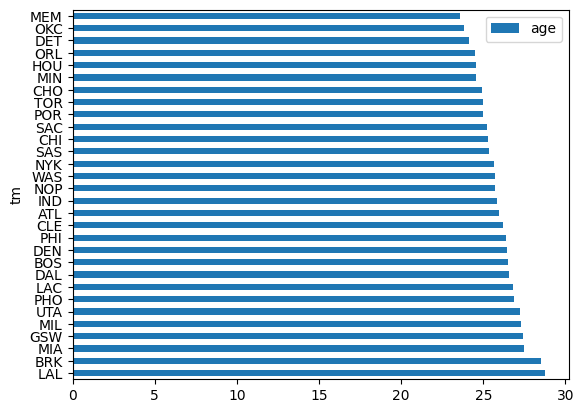

In [ ]:
mean_age.plot(kind='barh')

**Tim dengan jumlah pemain dibawah 25 tahun terbanyak**

In [ ]:
player_tm = df[(df['age'] <= 25)]
under = player_tm.groupby('tm').count()[['player']]

#Rename column
rename_col = under.rename(columns={'player':'Count'})
rename_col = rename_col.sort_values(by=['Count'], ascending=False)
rename_col

,Count
tm,
OKC,20
MEM,19
DET,19
SAC,16
ORL,16
WAS,15
POR,15
TOR,14
IND,14


<Axes: ylabel='tm'>

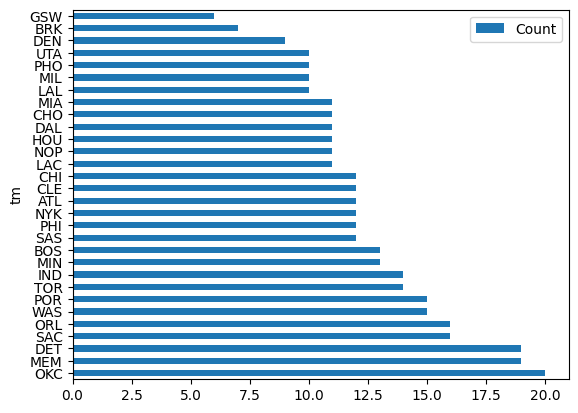

In [ ]:
#Plot
rename_col.plot(kind='barh')

**Tim dengan jumlah pemain diatas 25 tahun terbanyak**

In [ ]:
player_tm = df[(df['age'] > 25)]
under = player_tm.groupby('tm').count()[['player']]

#Rename column
rename_col = under.rename(columns={'player':'Count'})
rename_col = rename_col.sort_values(by=['Count'], ascending=False)
rename_col

,Count
tm,
BRK,17
MIL,17
DAL,16
BOS,15
WAS,14
LAL,14
UTA,14
CLE,13
DEN,13


<Axes: ylabel='tm'>

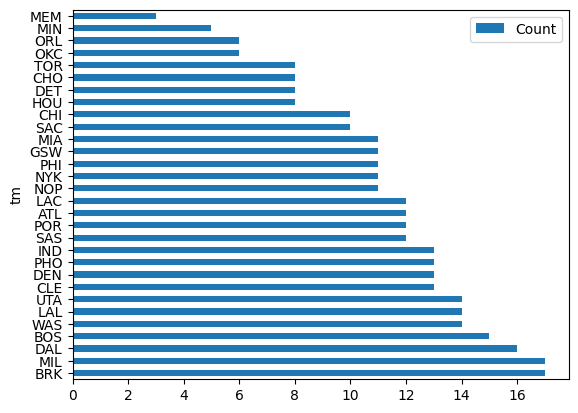

In [ ]:
#Plot
rename_col.plot(kind='barh')

**Tim dengan total point terbanyak**

In [ ]:
total_points = df.groupby('tm')['pts'].sum().to_frame()
total_points = total_points.sort_values(by=['pts'], ascending=False)
total_points

,pts
tm,
POR,264.1
IND,248.8
OKC,234.7
BRK,224.6
SAC,217.7
WAS,209.5
DET,206.5
LAC,205.3
ATL,191.8


<Axes: ylabel='tm'>

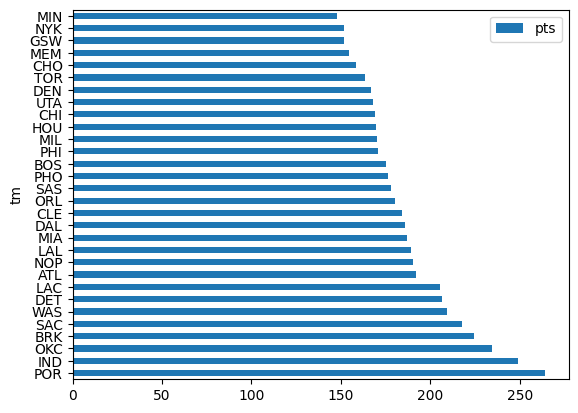

In [ ]:
total_points.plot(kind='barh')

**Pemain muda yang memiliki point terbanyak**

In [ ]:
young_age = df[(df['age'] <= 25) & (df['pts'] > 20)]
young_age = young_age.sort_values(by='pts', ascending=False).head(10)[['player', 'pts']]
young_age

,player,pts
178,Luka Don?i?,28.4
808,Trae Young,28.4
526,Ja Morant,27.4
708,Jayson Tatum,26.9
70,Devin Booker,26.8
515,Donovan Mitchell,25.9
254,Shai Gilgeous-Alexander,24.5
93,Jaylen Brown,23.6
230,De'Aaron Fox,23.2
355,Brandon Ingram,22.7


<Axes: ylabel='player'>

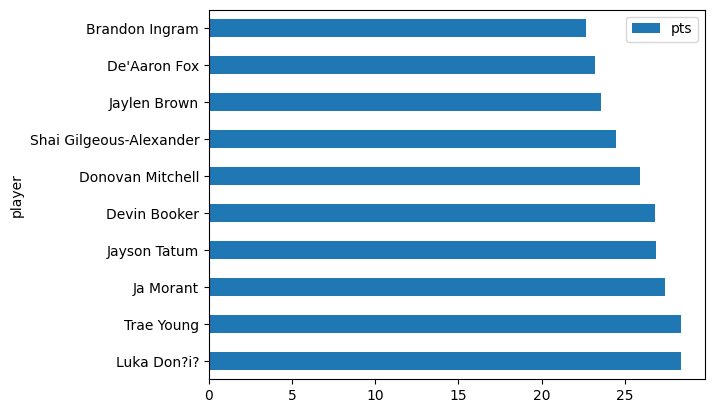

In [ ]:
young_age.plot(kind='barh', x='player', y='pts', )

**Posisi dengan Total Rebounds terbanyak**

In [ ]:
trb_player = df.groupby('pos')['trb'].count().to_frame()
trb_player.sort_values(by='trb', ascending=False)

,trb
pos,
SG,181
SF,142
PG,138
PF,131
C,116


<Axes: xlabel='pos'>

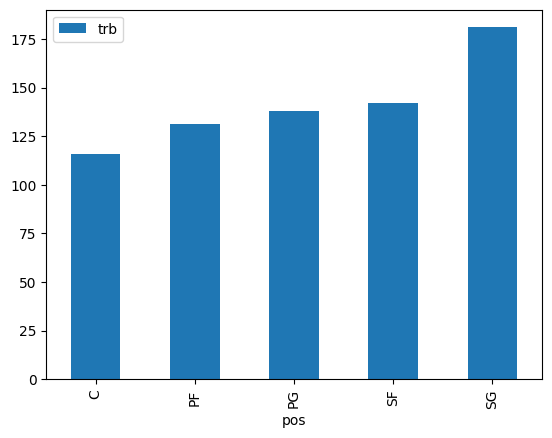

In [ ]:
trb_player.plot(kind='bar')

**Pemain dengan Total Rebound terbanyak**

In [ ]:
player_trb = df[(df['trb'] > df['trb'].min())][['player', 'pos', 'trb']]
player_trb = player_trb.sort_values(by='trb', ascending=False).head(7)
player_trb

,player,pos,trb
257,Rudy Gobert,C,14.7
391,Nikola Joki?,C,13.8
649,Domantas Sabonis,PF,12.3
648,Domantas Sabonis,C,12.1
320,Jaylen Hoard,SF,12.0
112,Clint Capela,C,11.9
206,Joel Embiid,C,11.7


<Axes: xlabel='player'>

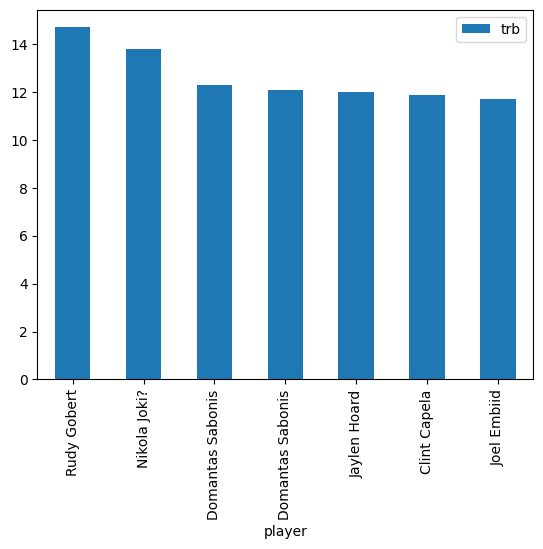

In [ ]:
player_trb.plot(kind='bar', x='player', y='trb')

**Pemain dengan posisi Center dengan point terbanyak**

In [ ]:
player_c = df[(df['pos'] == 'C') & (df['pts'] > df['pts'].min())][['player', 'pos', 'pts']]
player_c = player_c.sort_values(by='pts', ascending=False).head(7)
player_c

,player,pos,pts
206,Joel Embiid,C,30.6
391,Nikola Joki?,C,27.1
736,Karl-Anthony Towns,C,24.6
160,Anthony Davis,C,23.2
2,Bam Adebayo,C,19.1
648,Domantas Sabonis,C,18.9
797,Christian Wood,C,17.9


###Feature Engineering

**Feature Scalling**

In [ ]:
df.head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,pure_points
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,5.5
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,14.5
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,3.5
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,11.0
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,0.375,...,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,11.4


In [ ]:
'''
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale
'''

'\nfrom sklearn.preprocessing import StandardScaler\nstd_scale = StandardScaler()\nstd_scale\n'

In [ ]:
df_scale = df.copy()

In [ ]:
'''
num_cols = df_scale.select_dtypes(exclude=['object'])

for i in num_cols:
  df_scale[i] = std_scale.fit_transform(df[[i]])
df_scale.head()
'''

"\nnum_cols = df_scale.select_dtypes(exclude=['object'])\n\nfor i in num_cols:\n  df_scale[i] = std_scale.fit_transform(df[[i]])\ndf_scale.head()\n"

In [ ]:
'''
df_scale.info()
'''

'\ndf_scale.info()\n'

In [ ]:
'''
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_scale['pos'] = label_encoder.fit_transform(df_scale['pos'])
'''

"\nfrom sklearn import preprocessing\nlabel_encoder = preprocessing.LabelEncoder()\n\ndf_scale['pos'] = label_encoder.fit_transform(df_scale['pos'])\n"

In [ ]:
df_scale.head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,pure_points
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,5.5
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,14.5
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,3.5
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,11.0
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,0.375,...,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,11.4


Interpretasi:

- tidak melakukan feature scalling karena hasilnya akan berpengaruh terhadap silhoute score

###Modeling K-Means

Elbow Method

In [ ]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 1 to 811
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player       708 non-null    object 
 1   pos          708 non-null    object 
 2   age          708 non-null    int64  
 3   tm           708 non-null    object 
 4   g            708 non-null    int64  
 5   gs           708 non-null    int64  
 6   mp           708 non-null    float64
 7   fg           708 non-null    float64
 8   fga          708 non-null    float64
 9   fg%          708 non-null    float64
 10  3p           708 non-null    float64
 11  3pa          708 non-null    float64
 12  3p%          708 non-null    float64
 13  2p           708 non-null    float64
 14  2pa          708 non-null    float64
 15  2p%          708 non-null    float64
 16  efg%         708 non-null    float64
 17  ft           708 non-null    float64
 18  fta          708 non-null    float64
 19  ft%     

In [ ]:
X = df_scale.iloc[:, [5,28]].values
X[:5]

array([[75. ,  6.9],
       [56. , 19.1],
       [ 0. ,  4.1],
       [12. , 12.9],
       [19. , 12.8]])

In [ ]:
clustering_score = []

for i in range(1, 5):
  kmeans = KMeans(n_clusters=i, init='random', random_state=42)
  kmeans.fit(X)
  clustering_score.append(kmeans.inertia_)
print(clustering_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[445160.8169350284, 81069.09792920848, 40413.1807554934, 27419.02259598219]


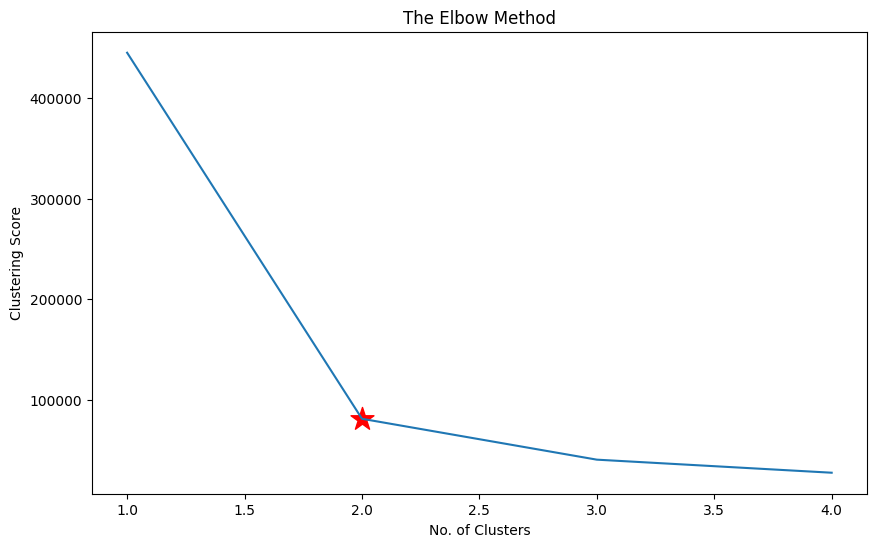

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5), clustering_score)
plt.scatter(2, clustering_score[1], s=300, c='red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

Compute K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X)
pred = kmeans.predict(X)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
df_scale['Cluster'] = pd.DataFrame(pred, columns=['Cluster'])
print('Number of data points in each cluster= \n', df_scale['Cluster'].value_counts())
df_scale.head()

Number of data points in each cluster= 
 0.0    481
1.0    134
Name: Cluster, dtype: int64


,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,drb,trb,ast,stl,blk,tov,pf,pts,pure_points,Cluster
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,5.5,1.0
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,14.5,0.0
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,3.5,0.0
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,11.0,0.0
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,0.375,...,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,11.4,1.0


Visualization

Text(0.5, 1.0, 'Players Clusters')

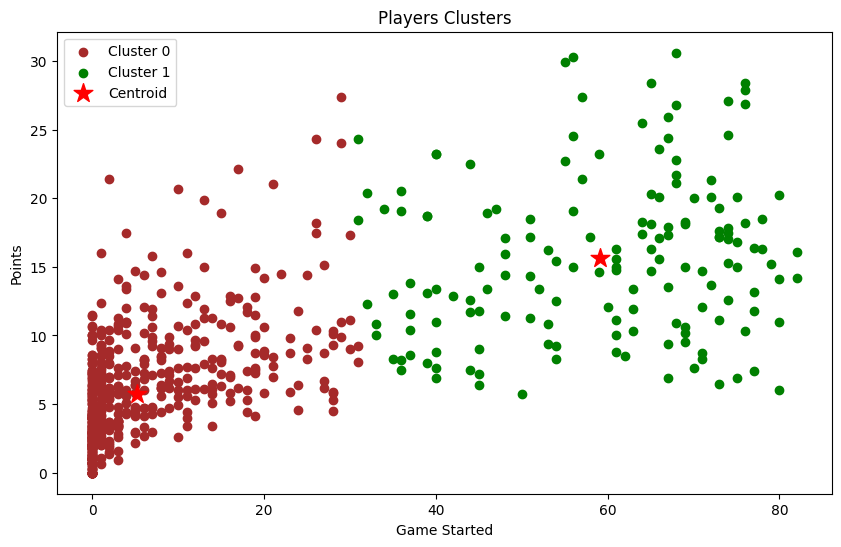

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroid', marker='*')
plt.legend()
plt.xlabel('Game Started')
plt.ylabel('Points')
plt.title('Players Clusters')

In [ ]:
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

In [ ]:
# Calculate Silhouette Coefficient
from sklearn.metrics import silhouette_score
sil_coeff = silhouette_score(X, kmeans.labels_)
print("Silhouette Coefficient:", sil_coeff)

Silhouette Coefficient: 0.7613970438259137
